<a href="https://colab.research.google.com/github/JuliPanei/Python/blob/main/Visualizacion_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="img/movistar_logo.png" width="200"  >

<h1><center>Diplomatura en ingeniería y ciencia de datos</center></h1>

# Visualización de datos con Seaborn

Seborn es una librería para hacer visualizaciones que se basa en matplotlib, pero tiene una serie de funcionalidades orientadas a la estadística descriptiva de los datos. Veremos a continuación algunos de los objetos y métodos principales. Pueden ahondar más en la documentación oficial:

https://seaborn.pydata.org/

Los tipos de gráfico principales se pueden agrupar en

#### Relational plots

Sirven para graficar la relación entre variables típicamente continuas.


#### Distribution plots

Los usamos para visualizar distribuciones típicamente univariadas.


#### Categorical plots

Nos sirven pare ver el número de observaciones de cada categoría de una variable categórica, o para ver distribuciones de una variable continua condicionada por categorías.

#### Regression plots

Relación entre dos variables continuas. Se muestra un scatterplot junto con la recta obtenida por una regresión lineal.


#### Matrix plots

Gráficos de calor para mostrar datos numéricos ordenados en una matriz. Por ejemplo correlaciones, o una función de dos variables.

#### Pair grids

Arreglo de gráficos en una grilla en donde las filas y columnas indican variables o niveles de variables categóricas.



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#### Dataset

La librería provee algunos datasets que podemos listar e importar con las funciones

* sns.get_dataset_names()
* sns.load_dataset('name')

Usaremos el dataset de "mpg" (miles per galon) que habla sobre el rendimiento de diferentes modelos de autos.

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
data_mpg=sns.load_dataset('mpg')
data_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
# Definimos una nueva variable categórica con la década del modelo.
data_mpg['decade']=np.round(data_mpg['model_year']/10)*10
data_mpg['decade']=data_mpg['decade'].astype(int)

Algunas funciones de las que veremos más abajo ignoran los datos nulos, mientras que otras pueden devolver un error. Por simplicidad vamos a remover los nulos desde ahora.

In [ ]:
data_mpg.dropna(inplace=True)

## Aspecto de los gráficos

Con el método set_context() podemos definir el aspecto general de los gráficos que vamos a hacer.



In [ ]:
sns.set_context("notebook",font_scale=1.2)
#sns.set_context("talk")
#sns.set_context("paper")

## Relational plots

* relplot: Figure-level interface for drawing relational plots onto a FacetGrid.
* scatterplot: Draw a scatter plot with possibility of several semantic groupings.
* lineplot: Draw a line plot with possibility of several semantic groupings.


### Scatterplot

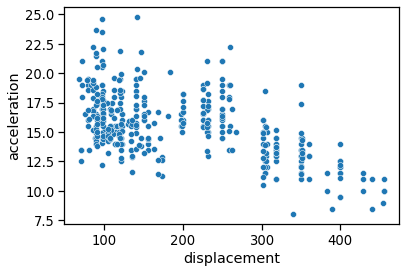

In [ ]:
g=sns.scatterplot(x='displacement',y='acceleration',data=data_mpg);

In [ ]:
type(g)

matplotlib.axes._subplots.AxesSubplot

### Axes properties

Vemos que el objeto creado es de tipo Axes de matplotlib, es decir que podemos podificar sus atributos como vimos en la notebook de matplotlib. Por ejemplo:

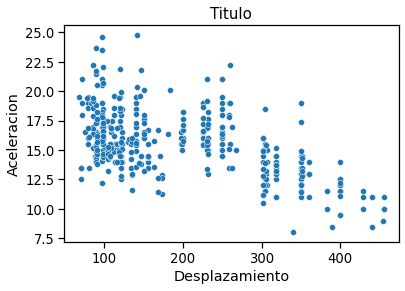

In [ ]:
g=sns.scatterplot(x='displacement',y='acceleration',data=data_mpg);
g.set_xlabel('Desplazamiento');
g.set_ylabel('Aceleracion');
g.set_title('Titulo',fontsize=15);

Si quisiéramos cambiar el tamaño del plot o ubicarlo dentro de una figura en particular como un subplot lo hacemos pasando el axes en donde queremos plotear usando el argumento ax.


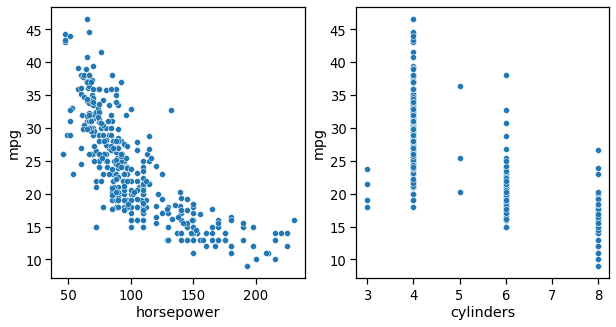

In [ ]:
Fig,Axes=plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x='horsepower',y='mpg',data=data_mpg,ax=Axes[0]);
sns.scatterplot(x='cylinders',y='mpg',data=data_mpg,ax=Axes[1]);

In [ ]:
Axes

array([<AxesSubplot:xlabel='horsepower', ylabel='mpg'>,
       <AxesSubplot:xlabel='cylinders', ylabel='mpg'>], dtype=object)

### hue, style, size

Para distinguir datos de acuerdo a una o más variables categóricas, podemos usar los argumentos hue, style y size. Hue define un color, syle un marcador y size un tamaño para cada categoría. De esta manera podemos codificar hasta tres variables categóricas.
Si tenemos menos, no está mal usar más de un recurso aunque sea redundante, para hacer más accesible la lectura del gráfico.

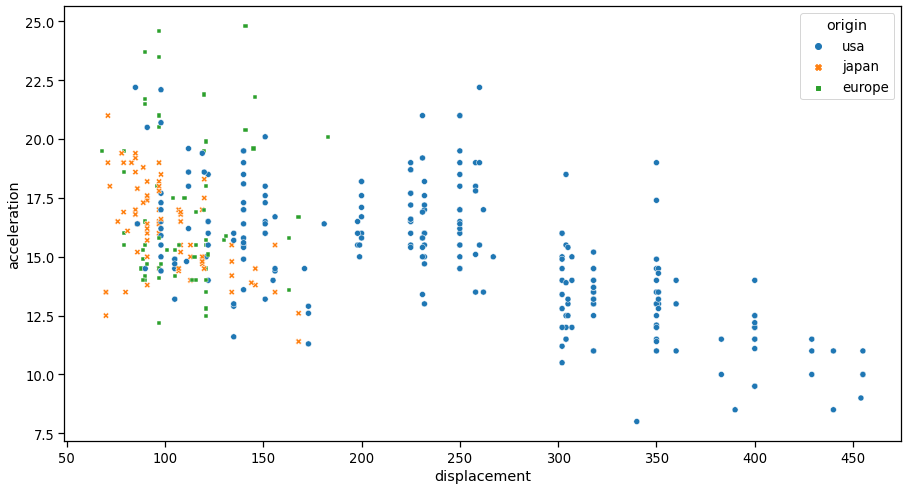

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='displacement',y='acceleration',data=data_mpg,hue='origin',style='origin');

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

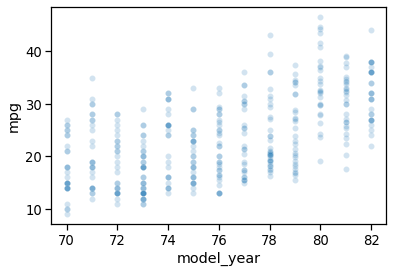

In [ ]:
sns.scatterplot(x='model_year',y='mpg',data=data_mpg,alpha=0.2)

### Lineplot

Grafica la relación entre dos variables como una linea. El argumento "ci" sirve para dar intervalos de confianza al valor de "y" dado el valor de "x". Un valor posible para "ci" es "sd", en donde toma la desviación estandar de los valores de "y" para cada valor de "x". Si pasamos un valor numérico, por ejemplo ci=95, grafica los intervalos de confianza al 95%. Esto lo hace siguiendo un procedimiento no paramétrico conocido como bootstrapping, que consiste en generar réplicas del dataset sampleando observaciones con reposición muchas veces (el argumento n_boot controla el numero de veces) y definiendo las bandas al 95% como el intervalo dentro del cual se observó "y" en el 95% de las réplicas.

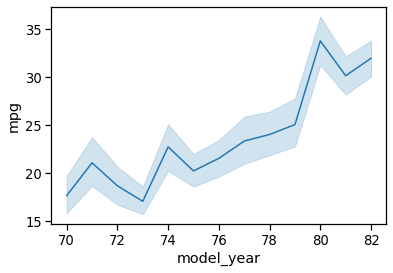

In [ ]:
sns.lineplot(x='model_year',y='mpg',data=data_mpg,ci=95);

### Relplot

A diferencia de los lineplots y scatterpolots que crean objetos a nivel Axes, relplot genera objetos a nivel Figure. Es decir que interactúa con matplotlib a un nivel más alto, mediante objetos de seaborn como Facetgrid. Una consecuencia de esto es que podremos hacer una figura compuesta por varios axes mediante la api de seaborn.

Por ejemplo:

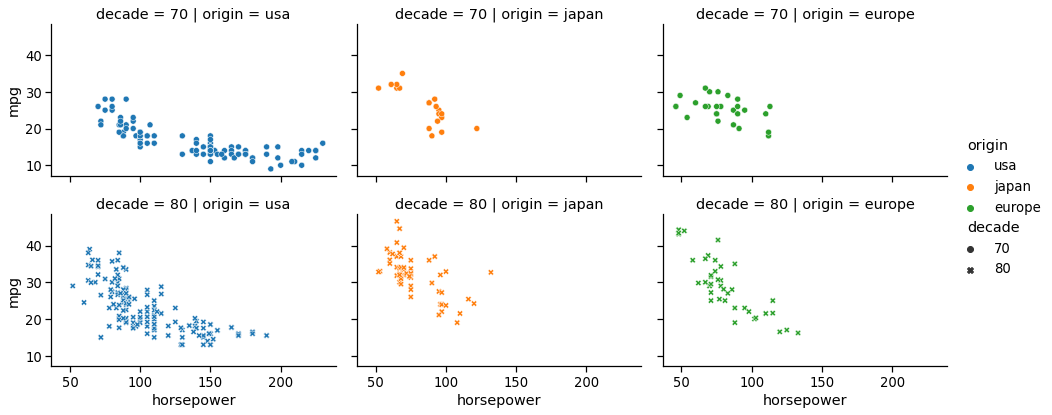

In [ ]:
f=sns.relplot(x='horsepower',y='mpg',data=data_mpg,col='origin',row='decade',hue='origin',style='decade',height=3,aspect=1.5)

In [ ]:
type(f)

seaborn.axisgrid.FacetGrid

## Distributions

En esta versión de seaborn veremos cómo generar histogramas con la función distplot que como veremos es muy flexible. Dado que estamos trabajando en python 2, no tenemos instalada la última versión de seaborn. En particular la función distplot está discontinuada para las últimas versiones en las cuales su versatilidad se dividió en varias funciones independientes (histplot, displot)

C:\Users\Chicho-July\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


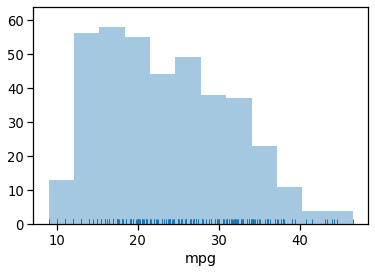

In [ ]:
# Histograma
sns.distplot(data_mpg['mpg'],kde=False,bins='auto',rug=True);

C:\Users\Chicho-July\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


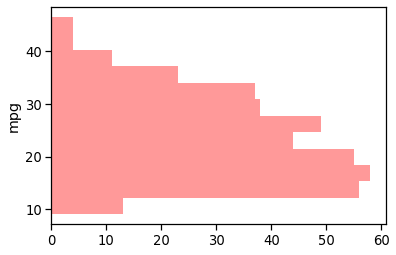

In [ ]:
# Histograma transpuesto
sns.distplot(data_mpg['mpg'],kde=False,vertical=True,color='red');

### kernel density estimate

El argumento kernel density estimate (kde) sirve para obtener una estimación de una función de densidad de probabilidades. Esto se logra haciendo una convolución del histograma con un nucleo (kernel) típicamente gaussiano. Notar que en el gráfico resultante el eje y está normalizado de modo que el área bajo la curva es igual a uno.

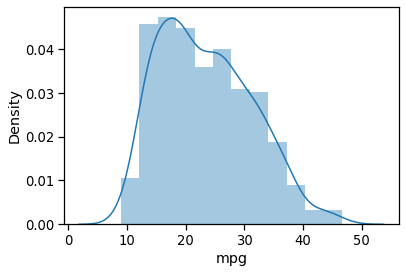

In [ ]:
# Histograma con kde
sns.distplot(data_mpg['mpg'],kde=True);

Podemos graficar solo el kde usando la función kdeplot. Esto puede ser útil para comparar varios histogramas. En este caso la función no cuenta con el argumento hue, así que lo hacemos a mano.

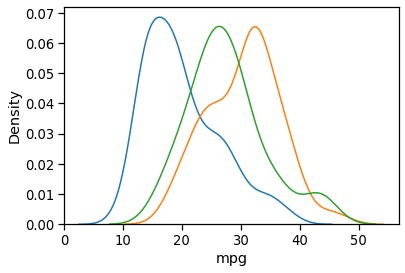

In [ ]:
mask_usa=data_mpg['origin']=='usa'
mask_japan=data_mpg['origin']=='japan'
mask_europe=data_mpg['origin']=='europe'

sns.kdeplot(data_mpg.loc[mask_usa,'mpg'],label='usa');
sns.kdeplot(data_mpg.loc[mask_japan,'mpg'],label='japan');
sns.kdeplot(data_mpg.loc[mask_europe,'mpg'],label='europe');
plt.xlabel('mpg');

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

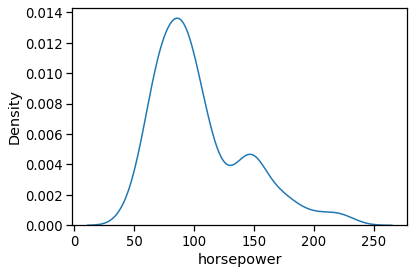

In [ ]:
sns.kdeplot(data_mpg['horsepower'])

### kde bivariada - curvas de nivel

Podemos graficar las curvas de nivel para la densidad de probabilidad estimada de los datos bivariados.

C:\Users\Chicho-July\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


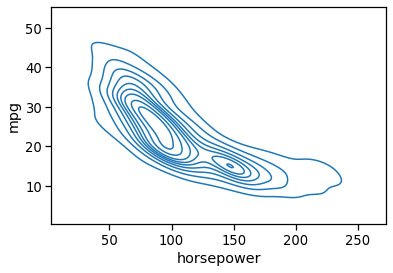

In [ ]:
sns.kdeplot(data_mpg['horsepower'],data_mpg['mpg']);

## Categorical plots


* catplot: Figure-level interface for drawing categorical plots onto a FacetGrid.
* stripplot: Draw a scatterplot where one variable is categorical.
* swarmplot: Draw a categorical scatterplot with non-overlapping points.
* boxplot: Draw a box plot to show distributions with respect to categories.
* violinplot: Draw a combination of boxplot and kernel density estimate.
* boxenplot: Draw an enhanced box plot for larger datasets.
* pointplot: Show point estimates and confidence intervals using scatter plot glyphs.
* barplot: Show point estimates and confidence intervals as rectangular bars.
* countplot: Show the counts of observations in each categorical bin using bars.

Veamos con distintos gráficos la distribución de rendimientos (mpg) para cada país y separados por década.

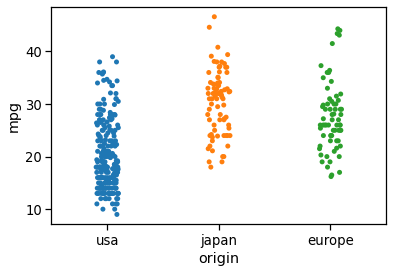

In [ ]:
sns.stripplot(x='origin',y='mpg',data=data_mpg);
#plt.legend(loc=(1,0.6),title='decade');

C:\Users\Chicho-July\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


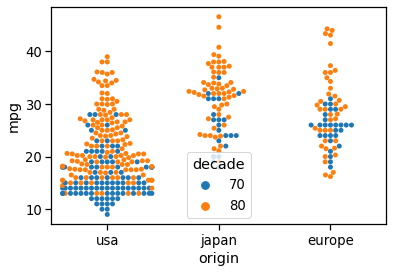

In [ ]:
sns.swarmplot(x='origin',y='mpg',data=data_mpg,hue='decade');

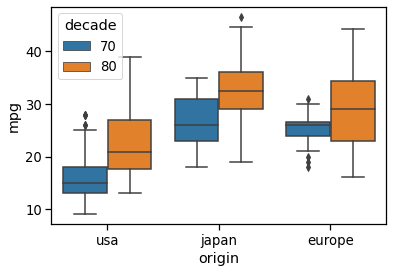

In [ ]:
sns.boxplot(x='origin',y='mpg',data=data_mpg,hue='decade');

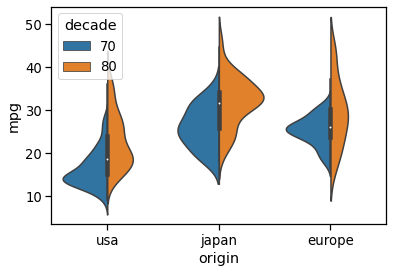

In [ ]:
sns.violinplot(x='origin',y='mpg',data=data_mpg,hue='decade',split=True);

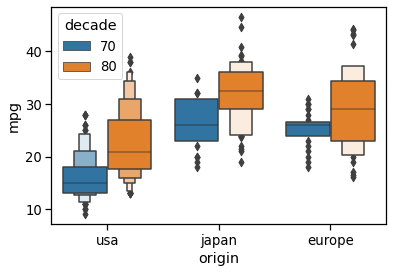

In [ ]:
sns.boxenplot(x='origin',y='mpg',data=data_mpg,hue='decade');

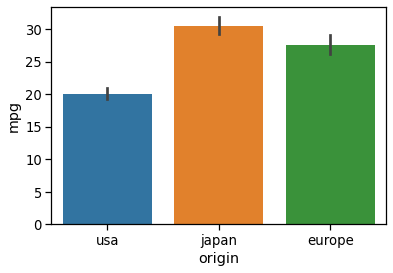

In [ ]:
sns.barplot(x='origin',y='mpg',data=data_mpg,ci=95);

Nótese cuánta menos información muestra el barplot que los anteriores. Estamos viendo solamente la media y el desvío estandar. Este tipo de gráficos tiene más sentido usarlos para mostrar por ejemplo proporciones.

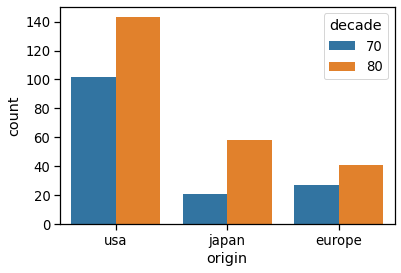

In [ ]:
# Número de observaciones de cada categoría

sns.countplot(x='origin',data=data_mpg,hue='decade');

Al igual que la función relplot para las variables relacionales, catplot opera a nivel figura para componer diferentes categorical plots.

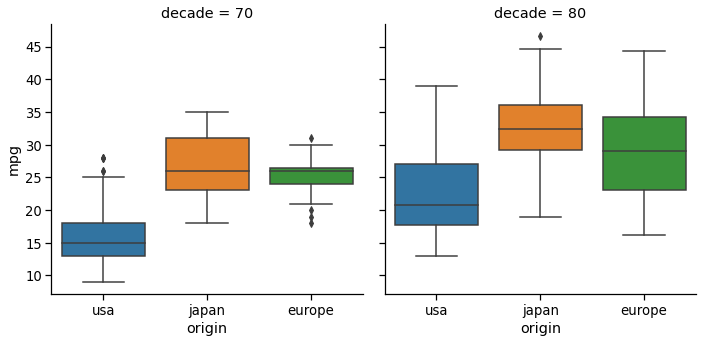

In [ ]:
sns.catplot(x='origin',y='mpg',data=data_mpg,col='decade',height=5,aspect=1,kind='box');

## Regression plot

* lmplot: Plot data and regression model fits across a FacetGrid.
* regplot: Plot data and a linear regression model fit.
* residplot: Plot the residuals of a linear regression.


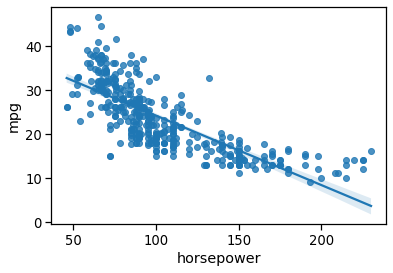

In [ ]:
sns.regplot(x='horsepower',y='mpg',data=data_mpg);

Vemos la recta que mejor ajusta a los datos, aunque claramente la relación entre las variables no es lineal. El argumento lowess sirve para hacer un ajuste lineal de los datos localizado en intervalos. Esto nos permite observar relaciones no lineales entre las variables.

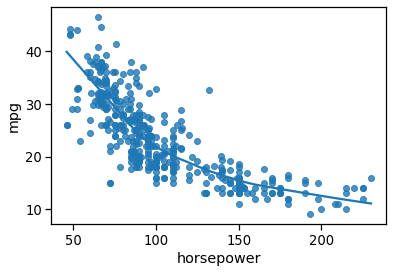

In [ ]:
sns.regplot(x='horsepower',y='mpg',data=data_mpg,lowess=True);

Podemos graficar los residuos de la regresion lineal y constatar que no es un buen modelo. (Veremos más adelante en el curso los detalles del modelo lineal).

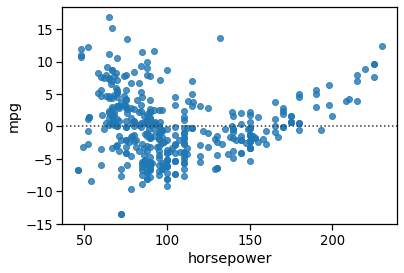

In [ ]:
sns.residplot(x='horsepower',y='mpg',data=data_mpg,);

## Matrix plots

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,decade
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.426816
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.250197
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.281274
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.346877
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.218067
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.255635
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.841627
decade,0.426816,-0.250197,-0.281274,-0.346877,-0.218067,0.255635,0.841627,1.000000


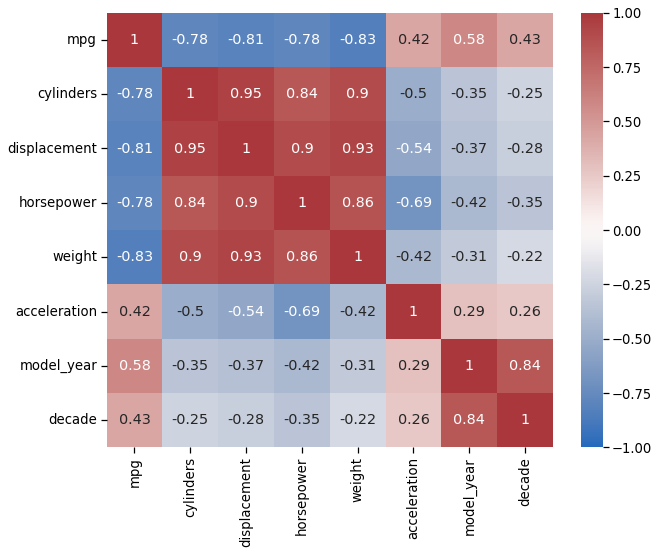

In [ ]:
mat_corr=data_mpg.corr()
display(mat_corr)
fig,ax=plt.subplots(figsize=(10,8))
sns.heatmap(mat_corr,annot=True,ax=ax,cmap="vlag",center=0,vmin=-1,vmax=1);

## Pairplots

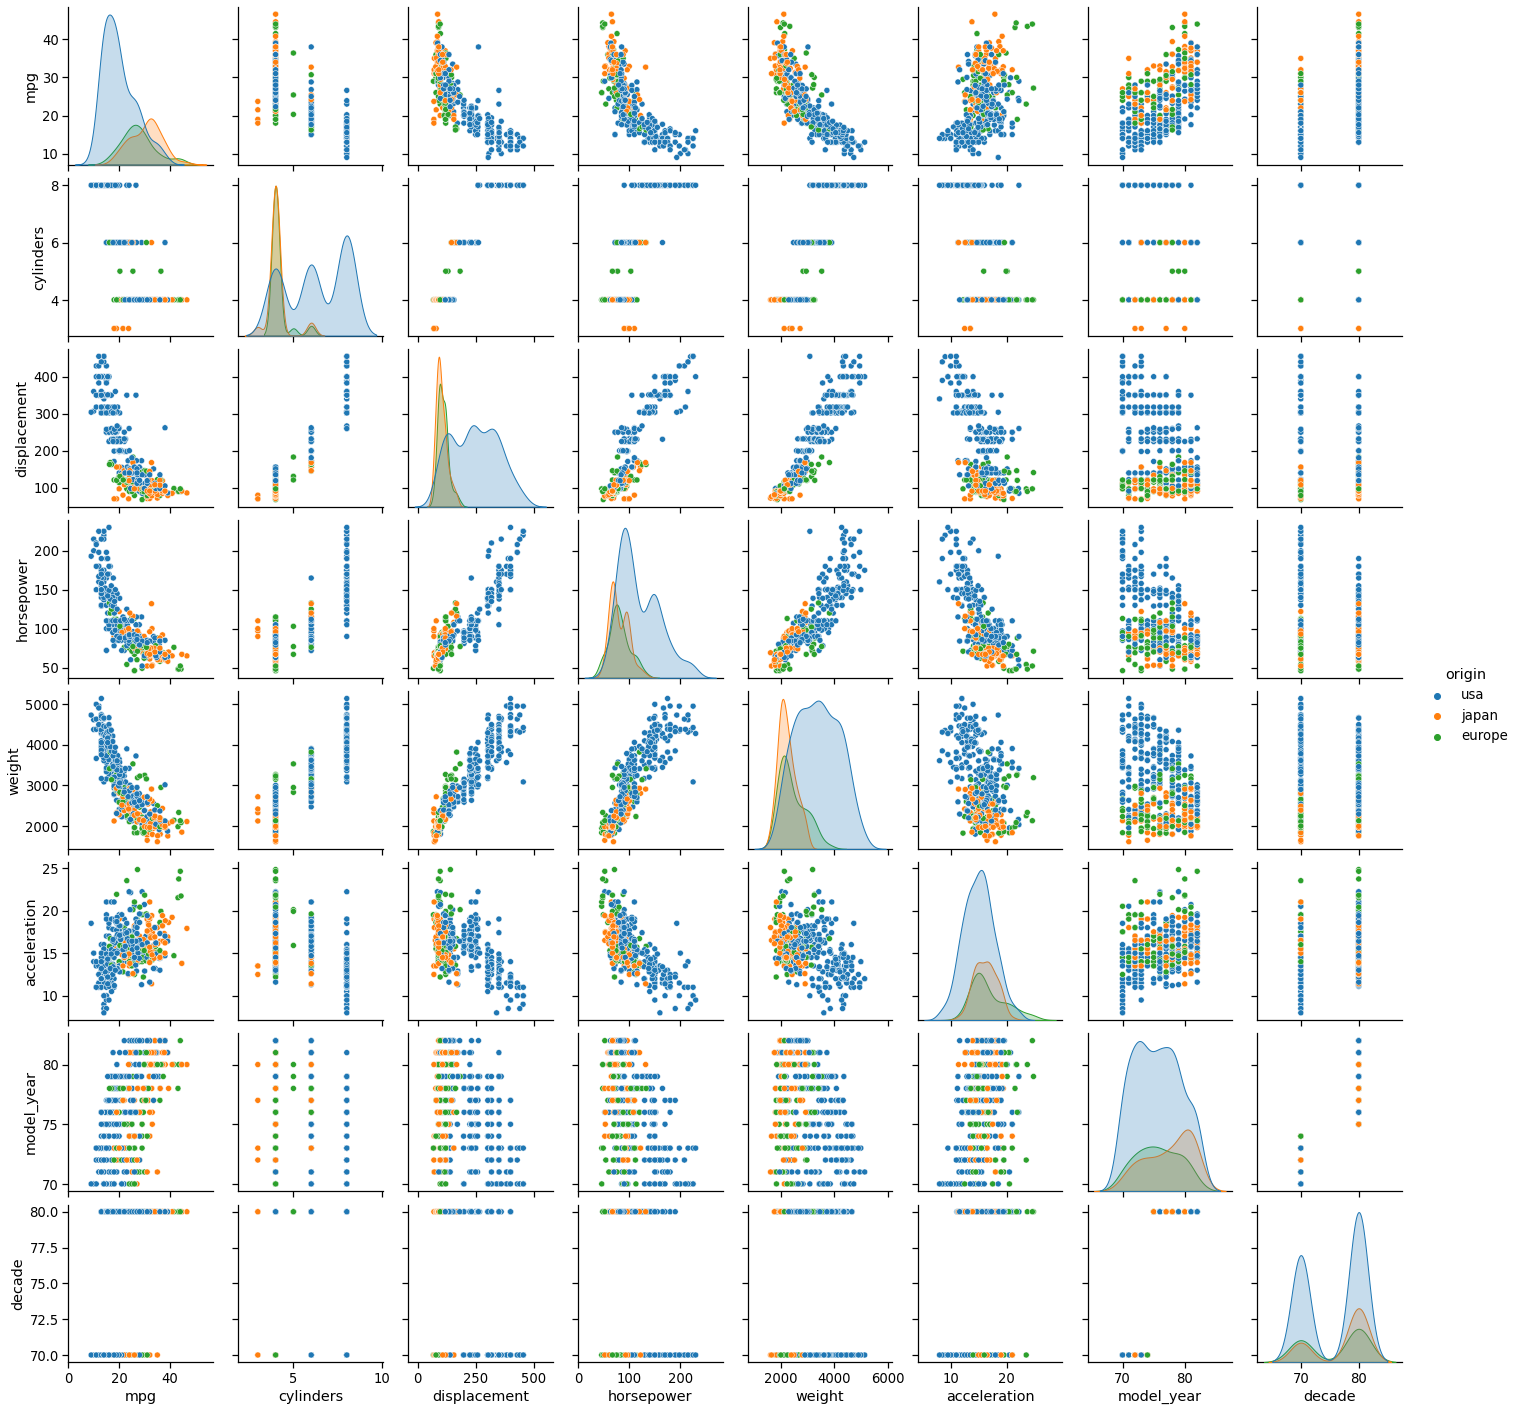

In [ ]:
sns.pairplot(data_mpg.dropna(),hue='origin');

El pairplot es muy útil para explorar las relaciones entre todos los pares de variables. Sin embargo, por su estructura es redundante (los elementos fuera de la diagonal están repetidos, aunque traspuestos). Creando un objeto PairGrid podemos implementar diferentes gráficos en el triángulo superior y en el inferior.

C:\Users\Chicho-July\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Chicho-July\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Chicho-July\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

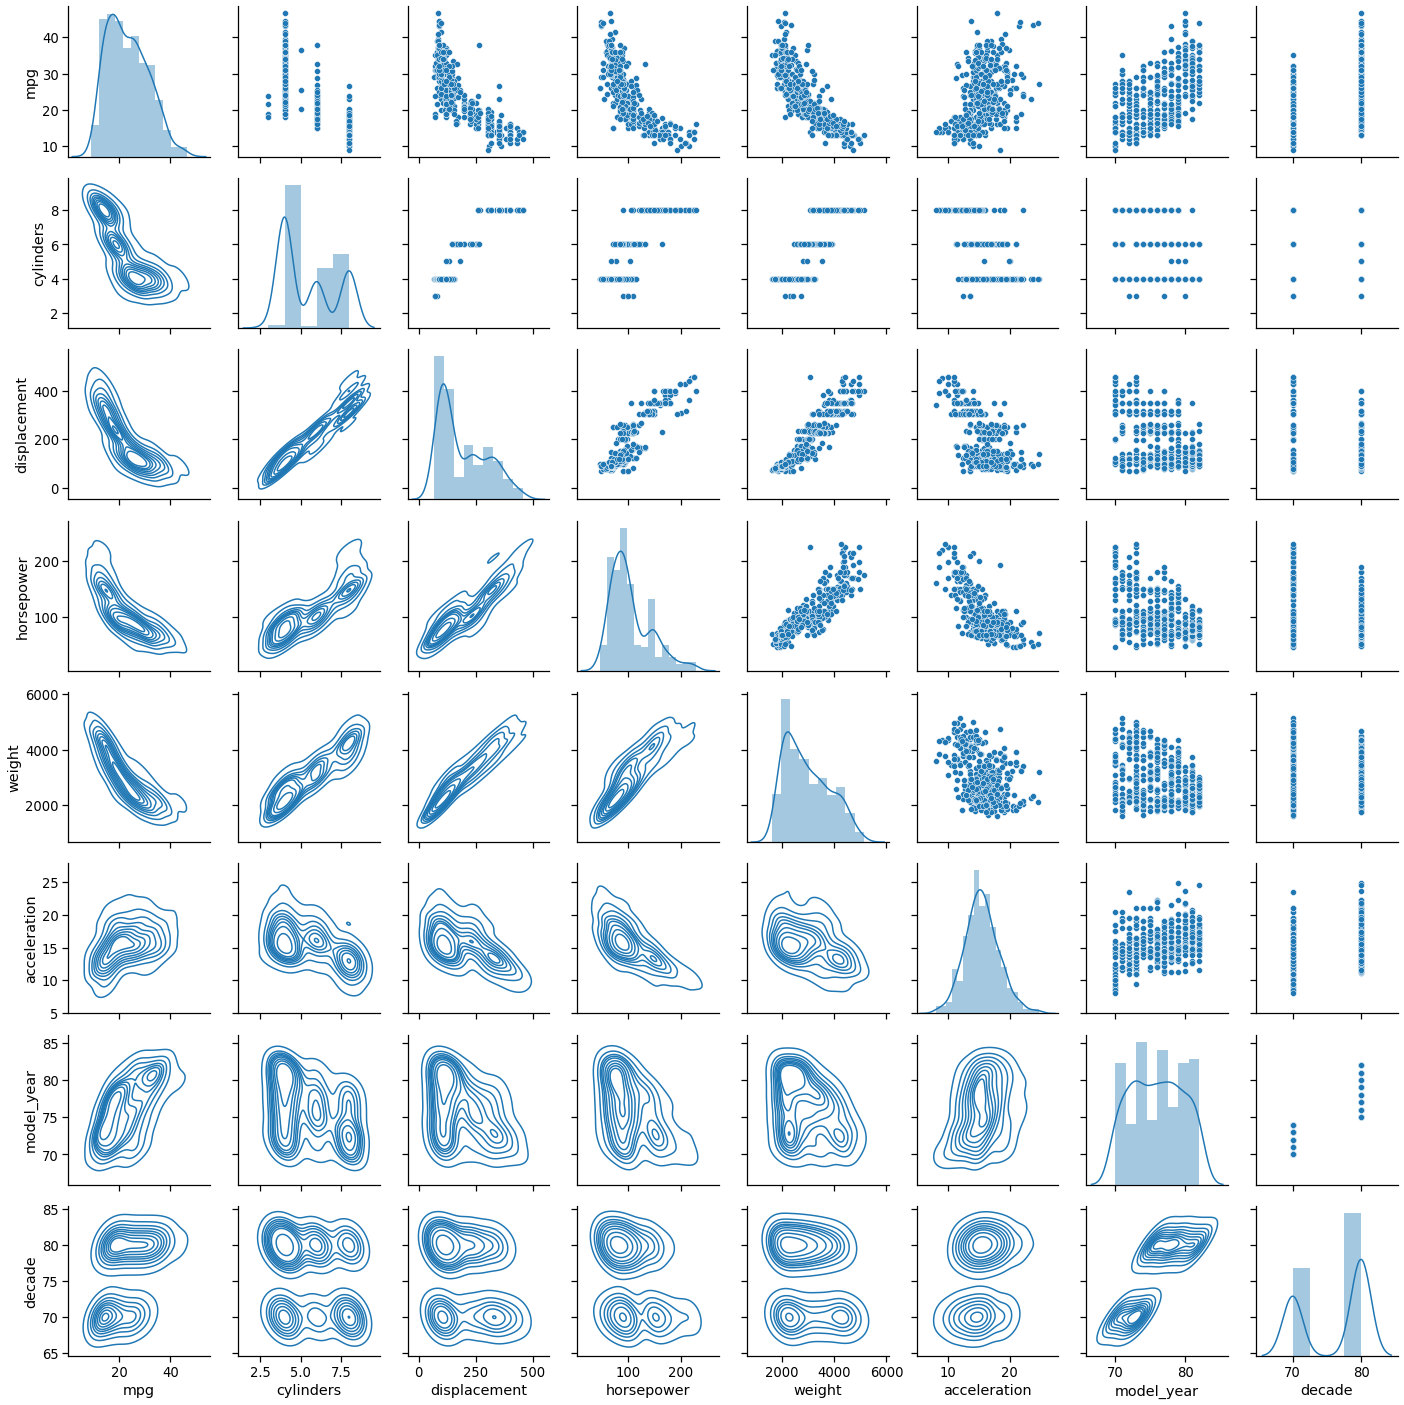

In [ ]:
g=sns.PairGrid(data=data_mpg.dropna(),diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_diag(sns.distplot,kde=True)
g.map_lower(sns.kdeplot)

## Jointplot

In [ ]:
sns.jointplot(x='horsepower',y='mpg',data=data_mpg,kind='hexa');